# Problem Statement -
### Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset Link -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.
Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
colums_name = ["UserId", "ProductId", "Ratings", "TimeStamp"]

In [3]:
rating_df = pd.read_csv("ratings_Electronics.csv", names=colums_name)

In [5]:
rating_df.head()

,UserId,ProductId,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId       object
ProductId    object
Ratings      float64
TimeStamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
rating_df.dtypes

UserId        object
ProductId     object
Ratings      float64
TimeStamp      int64
dtype: object

In [9]:
rating_df.columns

Index(['UserId', 'ProductId', 'Ratings', 'TimeStamp'], dtype='object')

In [10]:
rating_df.shape

(7824482, 4)

In [11]:
rating_df.drop(["TimeStamp"],axis=1, inplace=True)

In [12]:
rating_df.head()

,UserId,ProductId,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


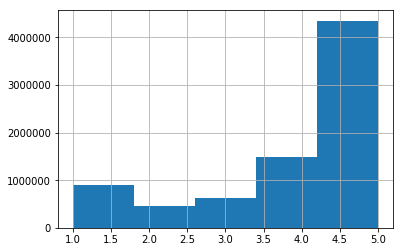

In [13]:
rating_df["Ratings"].hist(bins=5)

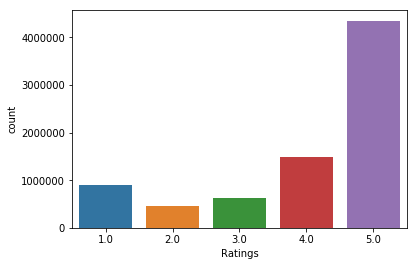

In [14]:
sns.countplot(rating_df["Ratings"])

# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [15]:
# Groupby "UserId" 
rating_df.groupby(["UserId"])["Ratings"].count().sort_values(ascending=False).head()

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Ratings, dtype: int64

In [16]:
user_grp_df = pd.DataFrame(rating_df.groupby(["UserId"])["Ratings"].mean())

In [17]:
# Create new dataframe with UserId, mean rating and rating count for each feature.
user_grp_df["Rating_Count"] = pd.DataFrame(rating_df.groupby("UserId")["Ratings"].count())

In [18]:
user_grp_df.head()

,Ratings,Rating_Count
UserId,,
A00000262KYZUE4J55XGL,5.0,1
A000063614T1OE0BUSKUT,5.0,2
A00009182QVLSWIGHLS1B,5.0,1
A00009661LC9LQPGKJ24G,5.0,1
A00010809P09NUU6ZP6H,5.0,1


In [19]:
# Sort and check based on rating count
user_grp_df["Rating_Count"].sort_values(ascending=False).head(10)

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: Rating_Count, dtype: int64

### Filter users who have give atleast 50 ratings

In [18]:
user_filter_df = user_grp_df[user_grp_df["Rating_Count"] >= 50]

In [19]:
# Reset index
user_filter_df.reset_index(inplace=True)
user_filter_df.head()

,UserId,Ratings,Rating_Count
0,A100UD67AHFODS,4.508621,116
1,A100WO06OQR8BQ,3.651515,132
2,A105S56ODHGJEK,3.838235,68
3,A105TOJ6LTVMBG,3.845070,71
4,A10AFVU66A79Y1,4.184615,65


In [20]:
user_filter_df.columns

Index(['UserId', 'Ratings', 'Rating_Count'], dtype='object')

In [21]:
print("Number of users given 50 or more ratings: ", len(user_filter_df))

Number of users given 50 or more ratings:  1540


In [22]:
# Filter and create new dataframe for the users who have given altleast 50 ratings
UsersRating50 = rating_df.UserId.isin(user_filter_df.UserId)
atleast_50rating_df = rating_df[UsersRating50]

In [23]:
print('Number of unique USERS = ', atleast_50rating_df['UserId'].nunique())
print('Number of unique ITEMS = ', atleast_50rating_df['ProductId'].nunique())

Number of unique USERS =  1540
Number of unique ITEMS =  48190


In [24]:
atleast_50rating_df.columns

Index(['UserId', 'ProductId', 'Ratings'], dtype='object')

In [25]:
RatingsMatrix = atleast_50rating_df.pivot(index = 'UserId', columns ='ProductId', values = 'Ratings').fillna(0)
print('Shape of final_ratings_matrix: ', RatingsMatrix.shape)

NumOfRatings = np.count_nonzero(RatingsMatrix)
print('given_num_of_ratings = ', NumOfRatings)

TotalPossibleRating = RatingsMatrix.shape[0] * RatingsMatrix.shape[1]
print('Total number of possible rating  = ', TotalPossibleRating)


Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
Total number of possible rating  =  74212600


In [26]:
RatingsMatrix.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Build Popularity Recommender model.

### Recommend top 10 popular products

In [27]:
rating_df.head()

,UserId,ProductId,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [28]:
print("Number of products: ",rating_df["ProductId"].nunique())

Number of products:  476002


In [29]:
# Use Groupby on "ProductId" feature and then count. 
rating_df.groupby(["ProductId"])["Ratings"].count().sort_values(ascending=False).head()

ProductId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Ratings, dtype: int64

In [30]:
Product_df = pd.DataFrame(rating_df.groupby(["ProductId"])["Ratings"].mean())

In [31]:
# Create new dataframe with ProductId, mean rating and rating count for each feature.
Product_df["Rating_Count"] = pd.DataFrame(rating_df.groupby("ProductId")["Ratings"].count())
Product_df.head()

,Ratings,Rating_Count
ProductId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


In [32]:
Product_df["Rating_Count"].sort_values(ascending=False).head()

ProductId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating_Count, dtype: int64

In [33]:
Product_df_mean = np.mean(Product_df["Ratings"].values)
Product_df_mean

3.889700263013201

In [34]:
min_rating = 50

In [35]:
def weighted_rating(Product_df, min_rating, Product_df_mean):
    weighted_rating = list()
    
    V = Product_df.Rating_Count.values
    R = Product_df.Ratings.values
    
    for v, r in zip(V, R):
        if v < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_rating))*r + (min_rating/(v+min_rating))*Product_df_mean)
    return(weighted_rating)

In [36]:
Product_df['weighted_rating'] = weighted_rating(Product_df, min_rating, Product_df_mean)

In [37]:
Product_df.head()

,Ratings,Rating_Count,weighted_rating
ProductId,,,
0132793040,5.000000,1,0.000000
0321732944,5.000000,1,0.000000
0439886341,1.666667,3,0.000000
0511189877,4.500000,6,3.955090
0528881469,2.851852,27,3.525779


In [38]:
Top10 = pd.DataFrame(Product_df["weighted_rating"].sort_values(ascending=False)).head(10)

In [39]:
Top10.reset_index(inplace=True)

In [40]:
print("Top 10 products:\n",list(Top10["ProductId"]))

Top 10 products:
 ['B0043WJRRS', 'B003FVVMS0', 'B007R5YGO2', 'B0029N3U8K', 'B009NB8WR0', 'B007SZ0E1K', 'B0033PRWSW', 'B001W28L2Y', 'B001W26TIW', 'B0041OYTJE']


# 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [41]:
atleast_50rating_df.head()

,UserId,ProductId,Ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [42]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [43]:
data = Dataset.load_from_df(atleast_50rating_df[['UserId', 'ProductId', 'Ratings']], reader)

In [44]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [45]:
# The training set will be a type of surprise.trainset.Trainset
type(trainset)

surprise.trainset.Trainset

In [46]:
# Test set will be a list
type(testset)

list

# 5. Build Collaborative Filtering model.

### For building both SVD and KNN model I am considering only those users how have given atleast 150 ratings, that is because of resource constraints. 


### Memory error was observed while building KNN model if all users given atleast 50 ratings are considered.  Such memory error is not observed with SVD model. But for comparison purpose I have used same training and test size for both the models.

In [47]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy

# SVD Model

In [48]:
rating_df.columns

Index(['UserId', 'ProductId', 'Ratings'], dtype='object')

In [84]:
rating_150_df = rating_df[rating_df['UserId'].isin(rating_df['UserId'].value_counts()[rating_df['UserId'].value_counts() >= 100].index)]
rating_150_df.head()

,UserId,ProductId,Ratings
118,AT09WGFUM934H,0594481813,3.0
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1777,A18S2VGUH9SCV5,1400501776,4.0
2162,A5JLAU2ARJ0BO,1400532655,1.0


In [85]:
rating_150_df.shape

(44209, 3)

In [86]:
rating_150_df["UserId"].nunique()

289

In [87]:
rating_150_df["ProductId"].nunique()

22635

In [88]:
data_150 = Dataset.load_from_df(rating_150_df[['UserId', 'ProductId', 'Ratings']], reader)

In [89]:
trainset150, testset150 = train_test_split(data_150, test_size=.30,random_state=42)

In [90]:
# Build the model using train dataset
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset150)

In [91]:
# Test with test data set in the trained model
predSVD = svd_model.test(testset150)

In [92]:
# compute RMSE
accuracy.rmse(predSVD, verbose=True)

RMSE: 1.5369


1.5369259507910564

# KNN Model

In [ ]:
KNN_model = KNNWithMeans(k=20, sim_options={'name': 'pearson', 'user_based': False})
KNN_model.fit(trainset150)

In [59]:
# Test with test data set in the trained model
predKNN = KNN_model.test(testset150)

In [60]:
# compute RMSE
accuracy.rmse(predKNN, verbose=True)

RMSE: 1.0304


1.030394291685626

# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

### RMSE of the Collaborative Recomendation system using SVD

In [61]:
# Test with test data set in the trained model
predSVD = svd_model.test(testset150)
# compute RMSE
accuracy.rmse(predSVD)

RMSE: 1.8477


1.8477348874628743

In [62]:
predSVD

[Prediction(uid='A3FEGTOLCWXSV4', iid='B004HVW0ZQ', r_ui=4.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B00622AG6S', r_ui=5.0, est=2.961333098326877, details={'was_impossible': False}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B003VAGXWK', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B00AA5LPT0', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B00FDLGMJE', r_ui=5.0, est=4.280800190638308, details={'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B005Z5HT2M', r_ui=2.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000JJSQ8U', r_ui=4.0, est=2.9654482811151572, details={'was_impossible': False}),
 P

### RMSE of the Collaborative Recomendation system using KNN

In [63]:
# Test with test data set in the trained model
predKNN = KNN_model.test(testset150)
# compute RMSE
accuracy.rmse(predKNN, verbose=True)

RMSE: 1.0304


1.030394291685626

In [64]:
predKNN

[Prediction(uid='A3FEGTOLCWXSV4', iid='B004HVW0ZQ', r_ui=4.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B00622AG6S', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B003VAGXWK', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B00AA5LPT0', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B00FDLGMJE', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B005Z5HT2M', r_ui=2.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000JJSQ8U', r_ui=4.0, est=4.5, details={'actual_k': 0, 'was_impossible': Fal

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

### Recommend top 5 product for all users present in test data.

In [65]:
testset[0:5]

[('A34C9AFFZOI45T', 'B000KMU0NU', 5.0),
 ('AXYM52DNK6NDF', 'B004C5HM6Y', 5.0),
 ('A1TQBAHI3M4ZBQ', 'B000ENRQ3M', 3.0),
 ('A1TDR7Y90SVCHL', 'B0055OKHQS', 5.0),
 ('A2IFKH3TJ10387', 'B005YR1PV2', 4.0)]

In [66]:
predictions = KNN_model.test(testset)

In [67]:
prediction_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in predictions])

In [68]:
prediction_df.columns = ["UserId", "ProductId", "Est_Rating"]
prediction_df.head()

,UserId,ProductId,Est_Rating
0,A34C9AFFZOI45T,B000KMU0NU,4.313817
1,AXYM52DNK6NDF,B004C5HM6Y,4.313817
2,A1TQBAHI3M4ZBQ,B000ENRQ3M,4.313817
3,A1TDR7Y90SVCHL,B0055OKHQS,4.313817
4,A2IFKH3TJ10387,B005YR1PV2,4.313817


In [69]:
prediction_df.sort_values(by=["UserId", "Est_Rating"], ascending=False,inplace=True)

### Top 5 recommandation

In [70]:
top5_recomm = prediction_df.groupby("UserId").head(5).reset_index(drop=True)

In [71]:
top5_recomm

,UserId,ProductId,Est_Rating
0,AZOK5STV85FBJ,B006MPRFJQ,4.313817
1,AZOK5STV85FBJ,B000093S2G,4.313817
2,AZOK5STV85FBJ,B000GL3MOY,4.313817
3,AZOK5STV85FBJ,B000ERAOMS,4.313817
4,AZOK5STV85FBJ,B000UGT5GO,4.313817
5,AZNUHQSHZHSUE,B0063705PE,4.313817
6,AZNUHQSHZHSUE,B005UA65YA,4.313817
7,AZNUHQSHZHSUE,B005BCAKO8,4.313817
8,AZNUHQSHZHSUE,B000FLWC9G,4.313817
9,AZNUHQSHZHSUE,B003FBQKZ0,4.313817


# 8. Summarise your insights.

1. RMSE of KNN model is 1.0304 and RMSE of SVD model is 1.5793. Based on RMSE value KNN based collaborative filtering have done a better job.

2. For building both SVD and KNN model I am considering only those users how have given atleast 150 ratings, that is because of resource constraints. 

3. There are many products with 5 rating and no other data to differentiate those products, So all the products with 5 rating and equal correlation have equal chance to recommend.

4. Here its used 'Matrix Factorization' based collaborative filtering. There are other types of collaborative filtering techniques like Clustering, Deep Learning based.

5. Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

6. The Popularity-based recommender system is non-personalised which may be not fit the user preferences.